# modelo de ref

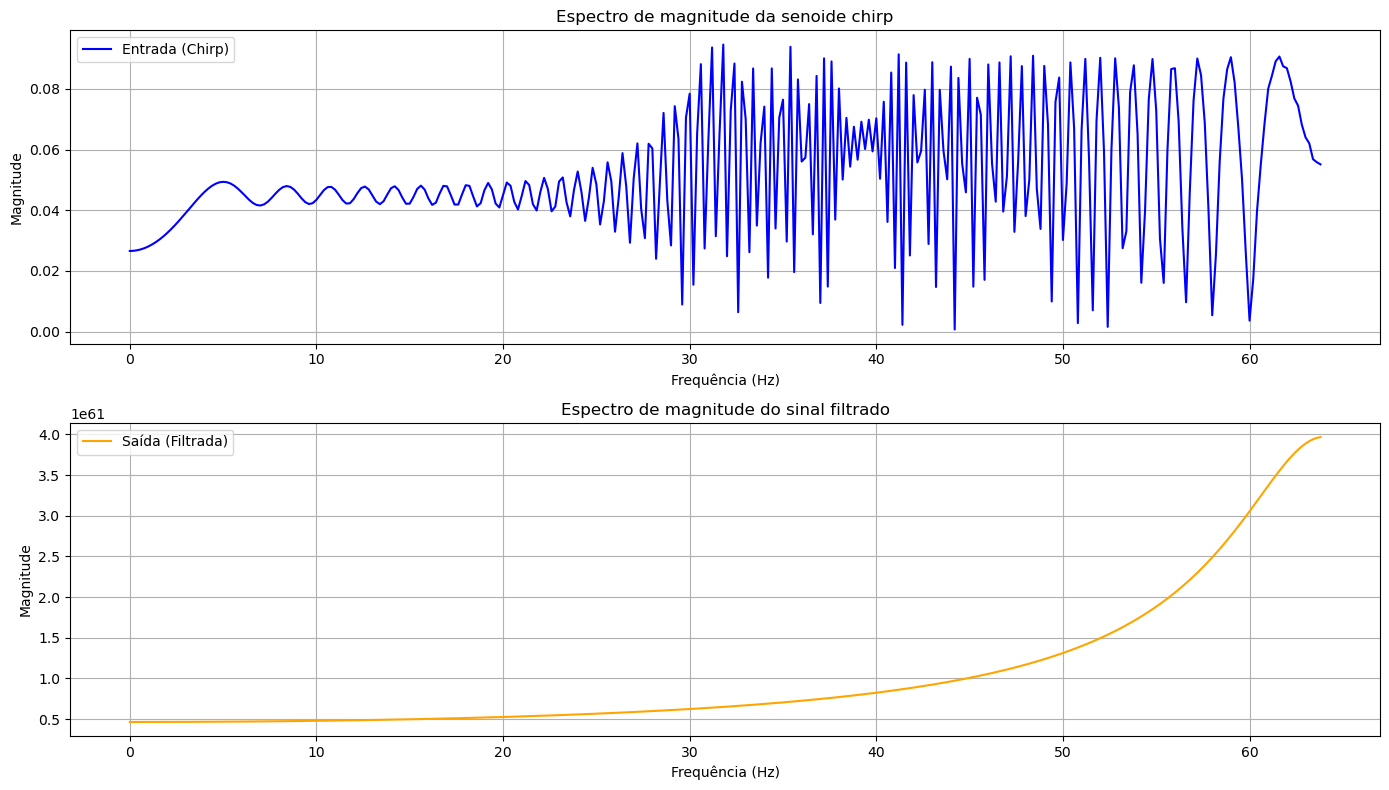

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import lfilter
from scipy.signal import TransferFunction, freqz
from scipy import signal

# Coeficientes do filtro IIR (exemplo fictício — substitua pelos seus)
b = np.array([0.5225, 3.8956, 12.9813, 25.2197, 31.2233, 25.2197, 12.9813, 3.9856, 0.5225])  # Numerador (coeficientes do input x[n])
a = np.array([1, 6.2653, 17.5674, 28.8094, 30.2340, 20.7995, 9.1563, 2.3605, 0.2730])  # Denominador (coeficientes do output y[n]) — a[0] deve ser 1

# Parâmetros do sinal
fs = 128  # Frequência de amostragem (Hz)
T = 5      # Duração do sinal (s)
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Vetor de tempo

# Senoide com variação de frequência: chirp linear
f0 = 1         # Hz
f1 = 100       # Hz
k = (f1 - f0) / T
x = np.sin(2 * np.pi * (f0 * t + 0.5 * k * t**2))

# Aplica o filtro IIR (lfilter faz a equação de diferença automaticamente)
y = lfilter(b, a, x)

# FFT do sinal original e do sinal filtrado
N = len(x)
X = fft(x)
Y = fft(y)
freqs = fftfreq(N, 1/fs)

# Espectro unilateral
half = N // 2
freqs = freqs[:half]
X_mag = np.abs(X[:half]) * 2 / N
Y_mag = np.abs(Y[:half]) * 2 / N

# Plotando resultados
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(freqs, X_mag, label='Entrada (Chirp)', color='blue')
plt.title('Espectro de magnitude da senoide chirp')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freqs, Y_mag, label='Saída (Filtrada)', color='orange')
plt.title('Espectro de magnitude do sinal filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

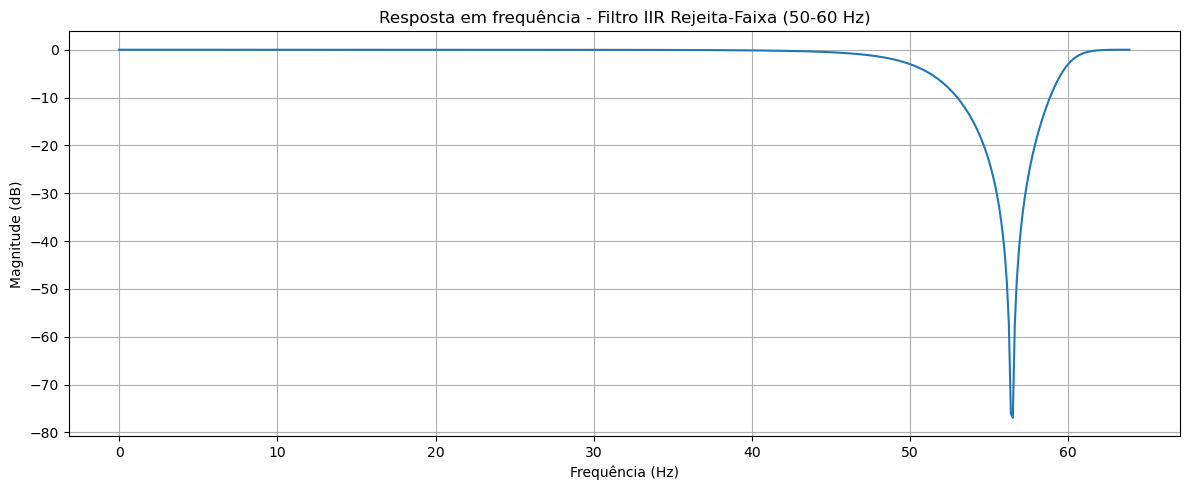

[1.         3.09665754 3.7744874  2.16475138 0.50000619]
[0.70572339 2.63070446 3.86304682 2.63070446 0.70572339]


In [25]:
from scipy.signal import iirfilter, freqz
#import matplotlib.pyplot as plt
#import numpy as np

# Parâmetros
fs = 128
order = 2

# Frequências **em Hz**, pois fs=128 já foi informado
low = 50
high = 60

# Corrigido: NÃO normaliza, pois fs já está sendo passado
b, a = iirfilter(order, [low, high], btype='bandstop', ftype='butter', fs=fs)

# Diagrama de Bode
w, h = freqz(b, a, fs=fs)
plt.figure(figsize=(12, 5))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title('Resposta em frequência - Filtro IIR Rejeita-Faixa (50-60 Hz)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()

print(a)
print(b)

# Gerando o filtro IIR com bibliotecas

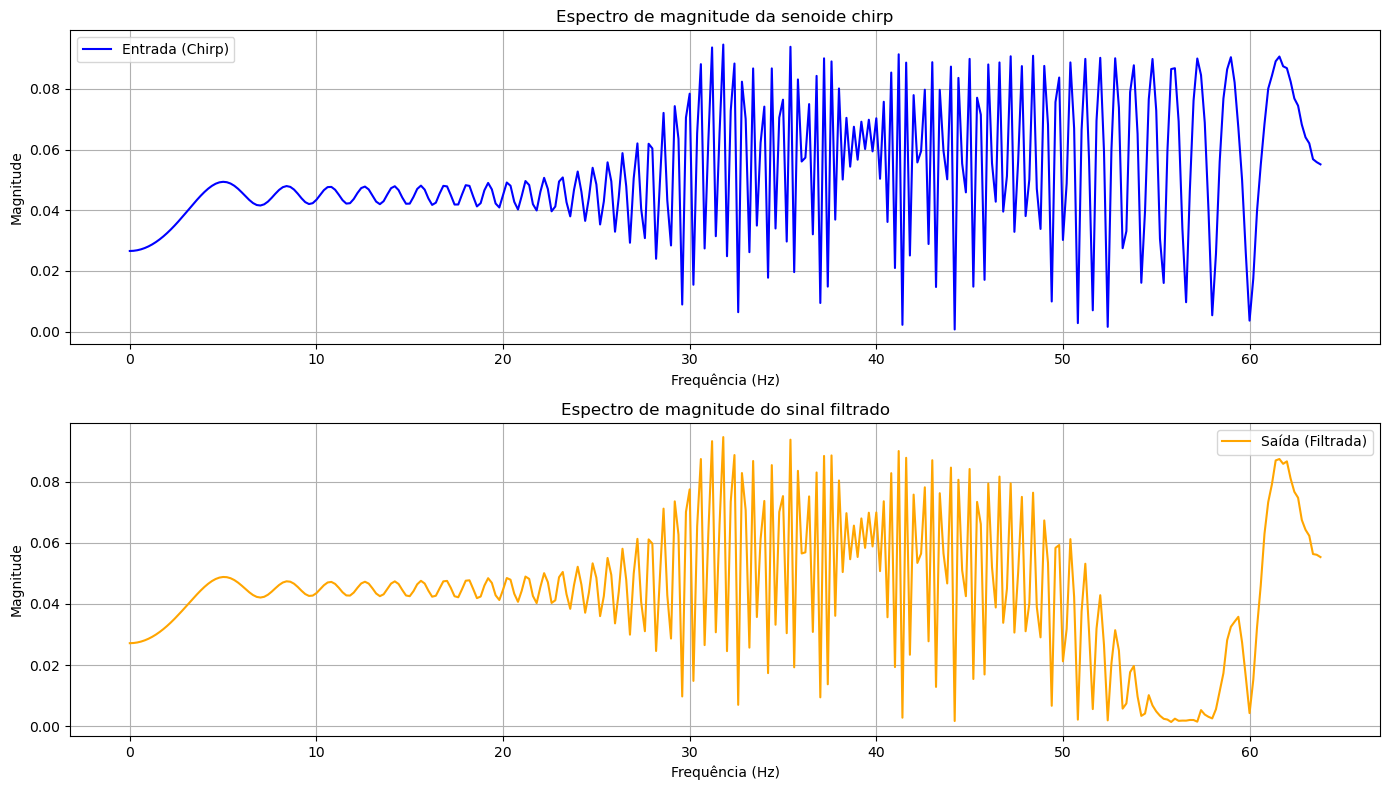

In [26]:
# Parâmetros do sinal
fs = 128  # Frequência de amostragem (Hz)
T = 5      # Duração do sinal (s)
t = np.linspace(0, T, int(T * fs), endpoint=False)  # Vetor de tempo

# Senoide com variação de frequência: chirp linear
f0 = 1         # Hz
f1 = 100       # Hz
k = (f1 - f0) / T
x = np.sin(2 * np.pi * (f0 * t + 0.5 * k * t**2))

# Aplica o filtro IIR (lfilter faz a equação de diferença automaticamente)
y = lfilter(b, a, x)

# FFT do sinal original e do sinal filtrado
N = len(x)
X = fft(x)
Y = fft(y)
freqs = fftfreq(N, 1/fs)

# Espectro unilateral
half = N // 2
freqs = freqs[:half]
X_mag = np.abs(X[:half]) * 2 / N
Y_mag = np.abs(Y[:half]) * 2 / N

# Plotando resultados
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(freqs, X_mag, label='Entrada (Chirp)', color='blue')
plt.title('Espectro de magnitude da senoide chirp')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(freqs, Y_mag, label='Saída (Filtrada)', color='orange')
plt.title('Espectro de magnitude do sinal filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Aplicar o filtro IIR manualmente
y = np.zeros_like(x)
for n in range(len(x)):
    # Parte do numerador
    for i in range(len(b)):
        if n - i >= 0:
            y[n] += b[i] * x[n - i]
    # Parte do denominador (ignorando a[0] = 1)
    for j in range(1, len(a)):
        if n - j >= 0:
            y[n] -= a[j] * y[n - j]

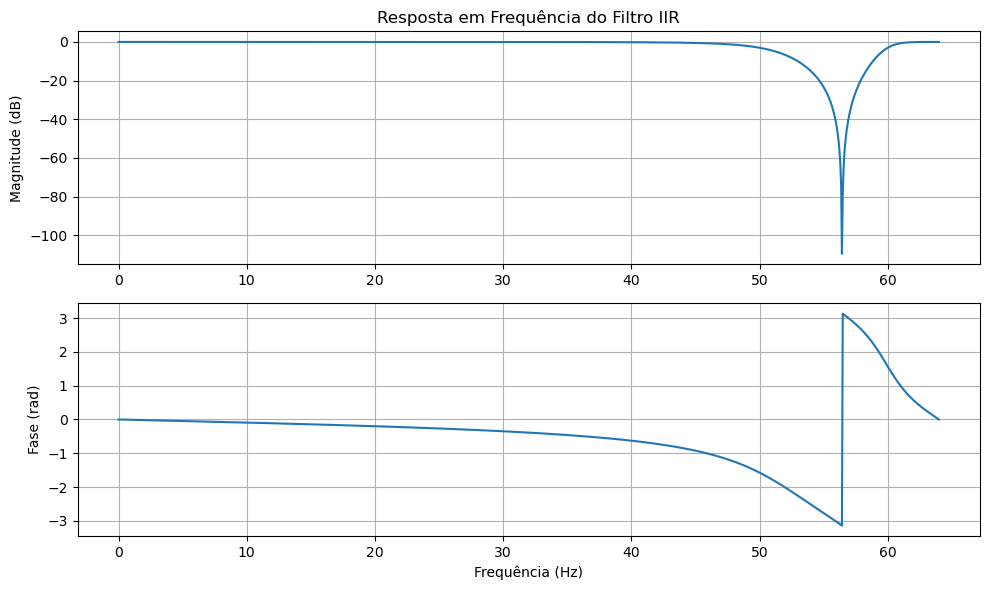

In [28]:
fs = fs  # Frequência de amostragem em Hz

# Frequências de 0 a fs/2 (em rad/amostra e depois convertidas para Hz)
w = np.linspace(0, np.pi, 1024)
f = w * fs / (2 * np.pi)  # Convertendo de rad/amostra para Hz
z = np.exp(-1j * w)

# Avaliar B(z) e A(z)
B = np.zeros_like(w, dtype=complex)
A = np.zeros_like(w, dtype=complex)

for i in range(len(b)):
    B += b[i] * z**i

for j in range(len(a)):
    A += a[j] * z**j

H = B / A

# Cálculo da magnitude e fase
magnitude_db = 20 * np.log10(np.abs(H))
fase_rad = np.angle(H)

# Plotar o diagrama de Bode com frequência em Hz
plt.figure(figsize=(10, 6))

# Magnitude
plt.subplot(2, 1, 1)
plt.plot(f, magnitude_db)
plt.ylabel('Magnitude (dB)')
plt.title('Resposta em Frequência do Filtro IIR')
plt.grid(True)

# Fase
plt.subplot(2, 1, 2)
plt.plot(f, fase_rad)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (rad)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [29]:
print(a)
print(b)

[1.         3.09665754 3.7744874  2.16475138 0.50000619]
[0.70572339 2.63070446 3.86304682 2.63070446 0.70572339]


In [30]:
a_q8 = a * (2**8)
b_q8 = b * (2**8)

In [31]:
print(a_q8)
print(b_q8)

[256.         792.74433003 966.26877545 554.17635369 128.00158519]
[180.66518718 673.46034186 988.93998629 673.46034186 180.66518718]


In [32]:
def ler_valores_saida(nome_arquivo):
    with open(nome_arquivo, 'r') as arquivo:
        valores = arquivo.read().strip().split(',')
        valores = [float(valor) for valor in valores if valor]  # Remove valores vazios
        return np.array(valores[12:])
        #return np.array(valores)

def signal_power(x):
    return np.sum(np.mean(x * np.conj(x), axis=0).real)

In [33]:
arquivo_saida = 'Sinais_de_saida/saida.txt'
sinal_out= ler_valores_saida(arquivo_saida)
#sinal_out1 = np.zeros(len(ecg_signal))
#potencia_ruido = signal_power(pli_noise)
#potencia_sinal = signal_power(sinal_out1)
#snr = 10 * np.log10(potencia_sinal / potencia_ruido)

In [34]:
w1 = signal.TransferFunction(a,b)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


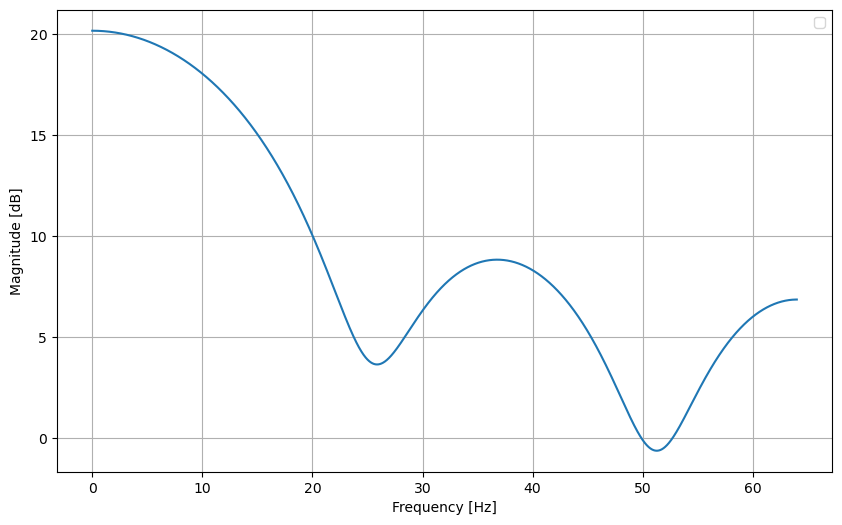

In [36]:
# Frequência de amostragem (em Hz)
fs = 128  # Frequência de amostragem

# Calcular a resposta em frequência
w, h = freqz(2*w1, worN=8000)

# Converter radianos para Hz
frequencies_hz = w * fs / (2 * np.pi)

# Plotar a magnitude da resposta em frequência
plt.figure(figsize=(10, 6))
plt.plot(frequencies_hz, 20 * np.log10(abs(h)))
#plt.title('Resposta em Frequência do Filtro FIR')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.legend()
plt.show()